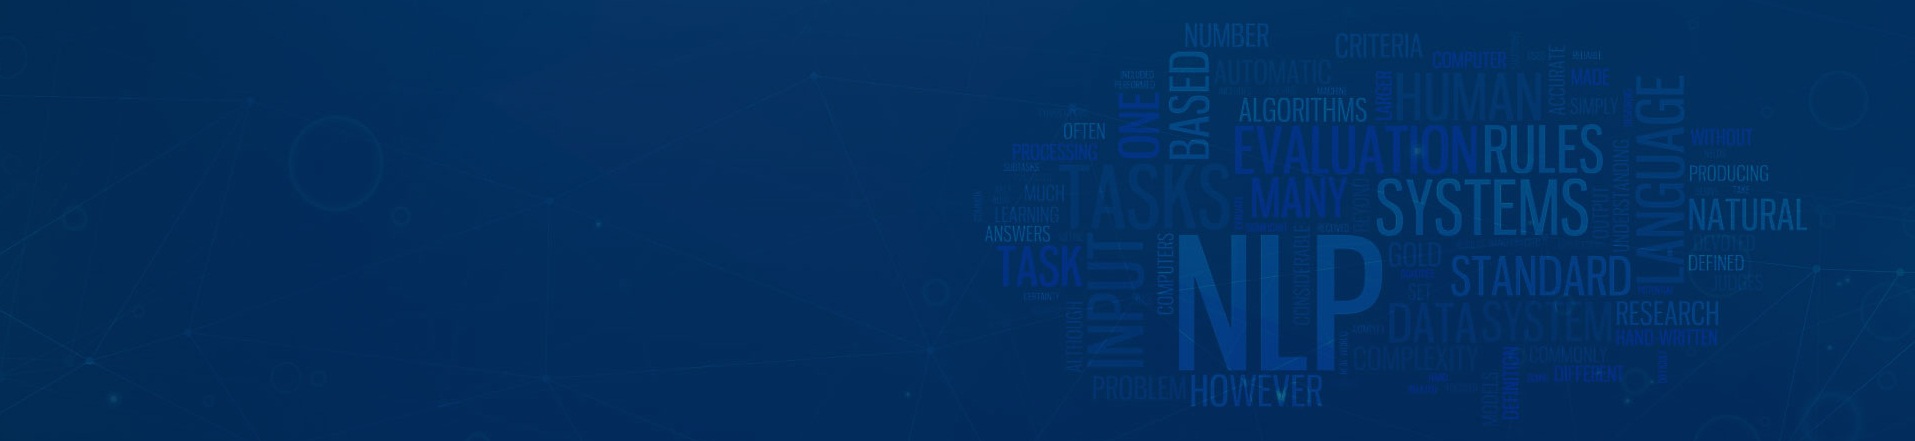

### Assignment 2
In this assignment we will start using the NLTK toolkit. Documentation can be found [here](https://www.nltk.org/). See also the lecture slides for examples on tokenization, stemming and lemmatization. 

In the previous exercises with regular expressions, all we could do was match patterns. The `sub` function from Python's `re` package is more powerful because it lets us match a pattern and then rewrite, or replace, that pattern with some other string. This corresponds to a finite-state transducer. Here is an example on how to use it:

In [ ]:
from re import sub
originalString = "I'm taking a first course in NLP and I like it 8-)"
newString = sub("\s"," | ", originalString) # we replace a single whitespace character \s with a vertical dash | surrounded by whitespace everywhere in the original string
print(newString)

The `sub` function takes the `originalString`, sequentially matches all whitespace characters, and replaces each of them with another pattern.

**Exercise 1.** Import the `sub` function and use it to replace all occurrences of *cheese* with *tofu* in the following text. Print out the result. <div style="text-align: right"> **(2 points)** </div> 

In [ ]:
from re import sub
text = "This may sound cheesy but I really like cheese. Yes, cheese is what I like." 

# your code here

**Exercise 2**. Sometimes we want to swap two letters or substrings in a text. For the strings below, use the `sub` function multiple times in a row to replace all **a**s with **c**s, all **c**s with **a**s and leave all **b**s unchanged. For example, the string **abc** should be rewritten as **cba** and the string **cbaac** should be rewritten as **abcca**, and so on. <div style="text-align: right"> **(3 points)** </div> 

In [ ]:
from re import sub
stringSet = ['a','c', 'bb', 'ccc', 'abc','bcc','cbaac', 'babcaab']

for string in stringSet:
    # your code here

**Exercise 3.** Sometimes text can contain repetitions of words or phrases that we want to remove automatically using the `sub` function. In the text below, find these repetitions and replace them with a single occurrence. Hint: in the previous **Assignment 1** we used a backreference `\1` to refer to a previous match. Use this method here. There are three cases you need to consider, repetition of a single letter word as in *a a*, words with multiple letters like *of of* and repeated phrases such as *do not, do not*.

The correct output from your regex should read: *Uhm, here is a piece of text, uh, that contains many repetitions that we do not want. Use the sub function to try and remove all of these.* <div style="text-align: right"> **(3 points)** </div> 

In [ ]:
from re import sub
text = "Uhm, here is a a piece of of text, uh, that contains many many repetitions that that we do not, do not want. Use the sub sub function to try and try and remove all of these these."

# your code here

**Exercise 4.** Consider the language $L=\{a^nb^n | n\geq 1\} = \{ab,aabb,aaabbb,aaaabbbb,...\}$ consisting of all strings starting with at least one **a**, followed by the exact same number of **b**s. For example *ab*, *aabb*, and *aaaaaaaaaaaaaaabbbbbbbbbbbbbbb* are in the language, but *ba*, *abb*, *aaabb* are not in the language. In the lecture we saw that this language is **not regular**, i.e., there is no regular expression that matches all and only the strings from this language. 

Here your task is to write more powerful code to recognize this language (i.e., accept all strings that are in the language, and reject all strings that are not in the language). To do this, use the `sub` function and a `while` loop: 

1. First, test if a string starts with at least one **a**, followed by any number of **b**s with a regular expression using `search` as in Assignment 1. If not, reject the string. 
2. If yes, repeatedly substitute the substring *ab* with the empty string **' '**  in a while loop. For this, it is best to write a separate function `my_replace` that takes the string as input and loops over it.
3. If the substitution loop ends up with the empty string, we accept the initial string, else we reject it. 
4. Test your solution on the string set provided below. Does it recognize the language $L$?

This exercise shows that substitution together with a loop is more powerful than regular expressions. Formally, `sub` defines a finite-state transducer that is then applied to a string recursively by the while loop. <div style="text-align: right"> **(4 points)** </div> 

In [ ]:
#Answer
from re import search,sub
stringSet = ["ab","aabb", "aaaabbbb", "aaaaaaaaabbbbbbbbb", "abab", "abb", "bbaa", "aabbb", "aa", "abbab", "aabbab", "abaabbab", "ababaabb", "aabbbabbb", "aabbaabba", "abbbb"]

# General solution: first check that a string is of the form a+b+, then delete ab's until string is empty

def my_replace(string): # this defines a function 'my_replace' in Python
    # your code here

for string in stringSet:
    # your code here

**Exercise 5.** In this exercise we use the [NLTK toolkit](https://www.nltk.org/). We start by importing NLTK and also load the Gutenberg corpus of texts. An overview of available corpora can be found [here](https://www.nltk.org/nltk_data/). From Gutenberg we import Lewis Carroll's 1865 novel *Alice's Adventures in Wonderland* like this: 

```import nltk
from nltk.corpus import gutenberg
sample = gutenberg.raw('carroll-alice.txt')
```

To see more texts in the Gutenberg collection, use `print(nltk.corpus.gutenberg.fileids())`

Now load Herman Melville's 1851 novel *Moby Dick*.

1. Count the number of characters in this text with the `len()` function and print it out.
2. Print out the first 1000 characters in the text (remind yourself how indexing works in Python).
3. Import the function `sent_tokenize()` from NLTK
4. Tokenize the corpus into sentences using `sent_tokenize()` and print out the number of sentences in the novel.<div style="text-align: right"> **(2 points)** </div> 

In [ ]:
import nltk
# nltk.download('gutenberg') # you may have to download these two modules
# nltk.download('punkt')
from nltk.corpus import gutenberg

# your code here
    
# now we tokenize the corpus into sentence tokens
    # your code here

**Exercise 6.** Now we want to do something with the sentences that we have extracted from the novel in the previous exercise. For example, we want to tokenize sentences into word lists, find the unique words, and plot the character length of these words.

1. Randomly select 100 sentences from the sentence-tokenized text, replace all newline characters `\n` with whitespace using `sub` and print out the first 10 sentences before and after removing linebreaks. Note that the representation of newline can differ between operating systems (OS). Use   `print(repr(my_string))` to check for your OS.
2. Inspect the sentence output. Are you happy with it? Are there sentences that shouldn't be considered sentence tokens? Rerun a different random selection several times. Support your answer with an example.
3. Import the function `word_tokenize()` from NLTK, apply it to each of the 100 sentences and inspect the word output. Are all of these tokens English words? Support your answer with an example.
4. For the words found by the tokenizer, find all unique words and collect the word lengths for these unique words. Hints: use list comprehension in Python and the `set()` function to find the unique words. Print out the average word length (rounded to the nearest integer) and the maximum word length.
5. Plot a histogram of these word lengths using `pyplot` from the `matplotlib` package. Set the number of bins to the maximum word length so that each bin in the histogram corresponds to an integer word length. Add appropriate text labels to the x-axis and y-axis and add a dashed red vertical line to the plot, indicating the exact average word length. <div style="text-align: right"> **(5 points)** </div> 

In [ ]:
from random import *
from re import sub
import statistics

    # your code here. Note: on Windows the newline character is typically represented as \r\n, Linux as \n, and as \r on MacOS 
    
# now tokenize these sentences into words
    # your code here

# get all unique words
    # your code here
    
# collect word lengths 
    # your code here
    
# plot histogram
    # your code here

**Exercise 7.** Stopwords are words that are very common in a language and that do not add a whole lot of meaning to a text. Also, NLP often is computationally expensive and it is crucial to process as little data as possible while still obtaining useful results. Thus, in some (but not all) NLP applications, we want to remove stopwords before a text is being processed. 

A list of stopwords is also sometimes called a *negative dictionary* of words that should be excluded. For example, when you type *Where can I get the best pizza in Nijmegen?* into a search engine, it is quite likely that the query is automatically reduced to *best pizza Nijmegen*. This procedure saves both storage space and time.

NLTK provides stopword lists for many different languages. 

1. Start by importing the stopword list for English from `nltk.corpus`, place it in a variable `stop_words`, and print it out.
2. Tokenize the example sentence below into a word list and print it out.
3. Iterate over this word list and remove all stopwords. Make sure you convert words to lower case first, because the list of stopwords contains only lower case words.
4. Print out the new sentence that has the stopwords removed. How many words were removed in this process?<div style="text-align: right"> **(2 points)** </div>

In [ ]:
import nltk
#nltk.download('stopwords') # you may have to download this module

# your code here

sentence = "This is an example sentence that we use to show off the removal of stop words which is a very common and essential preprocessing step in a lot of NLP tasks."
 
# your code here

**Exercise 8.** In this exercise we take a closer look at stemming (see lecture). Import the Porter Stemmer and the Lancaster Stemmer from the [NLTK toolkit](https://www.nltk.org/). 

The 9th sentence from *Alice in Wonderland* reads: *The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think
about stopping herself before she found herself falling down a very deep well.* 

Tokenize this sentence into words, run both stemmers on this word list and print out the result. Compare the output of the two stemmers for words where either one of the stemmers makes some change (i.e., ignore words which are kept the same by both stemmers). Find an example each where 

1. the Porter stemmer does a better job than the Lancaster stemmer, 
2. the Lancaster stemmer does a better job, 
3. both stemmers do the right thing, and 
4. both stemmers clearly make a mistake.<div style="text-align: right"> **(5 points)** </div>

In [ ]:
# your code here

sentence = "The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well."

# your code here

**Exercise 9.** Now we take a look at lemmatization. Import the `WordNetLemmatizer` from NLTK.

1. Run it on the string below (you need to tokenize it first), print out and inspect the result.
2. What do you notice about the lemmatizer's output? Which words are lemmatized correctly? Which are incorrect?
3. Copy/paste the sentence into the online lemmatizer https://cst.dk/online/lemmatiser/uk/ and look at its output (you need to tick the boxes *tokenisation* and *lemmatisation* before submitting the input). Which words are lemmatized correctly, which are still wrong?
4. An explanation for the behavior of the `WordNetLemmatizer` was given in the lecture. Run the lemmatizer again on the same list of words but this time tell the lemmatizer to treat all words as verbs. Are the verbs lemmatized correctly? Why is *rocks* lemmatized correctly in both runs?<div style="text-align: right"> **(4 points)** </div>

In [ ]:
#nltk.download('wordnet') # you may have to download this module

# your code here

string = "larger rocks were suddenly thinking about corpora"

# your code here    